In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Chapter 4
1- Use the section “Applying the Monte Carlo method for Pi estimation” on Page 91 of the book and use Python codes to calculate Pi. NOTE: Instead of 1⁄4 of the circle (depicted in Figure 4.2), use half (1/2) of the circle and redo the exercise accordingly.

a. Repeat the Python code using N = 100, 1000, 10000. Explain about the initial value and the role of Large Numbers in the calculation of Pi number. Explain all the codes, all functions, and different methodology in Python.



Here are three outputs of Monte Carlo method, 100, 1000, 10000 times separately. Running larger samples will reduce the confidence intervals further, and will increase model accuracy. In order to produce a precise result, we need more sample sizes. Compared reunning 100 and 1000 times, if we run n time with large sizes (such as 10000 below), we can find more data points along with the circumference, meaning that we can estimate Pi more accurate.

N = 100 M = 79 Pi = 3.16


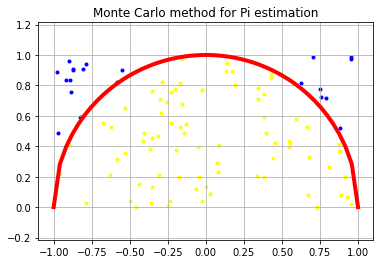

N = 1000 M = 764 Pi = 3.06


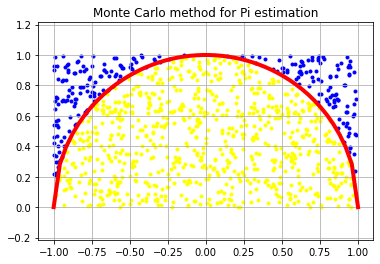

N = 10000 M = 7870 Pi = 3.15


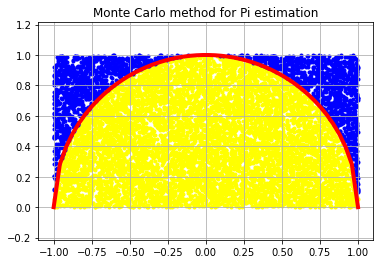

In [2]:
def piEstimation(N):
  # N = random numbers that we generated
  M = 0 # the number of points that fall in the circular sector, default is 0
  # create the array to save the vectors that will contain the coordinates of the points
  XCircle=[]  # circle x
  YCircle=[]  # circle y
  XSquare=[]  # square x
  YSquare=[]  # square y

  for p in range(N):
      x=random.uniform(-1, 1) # random number to generate the points between -1 to 1 so we have a half circle
      y=random.uniform(0, 1)
      # (x - x0)^2 + (y - y0)^2 = r^2
      if (x**2 + y**2 <= 1):
          M += 1 # condition is satisfied, meaning that x and y fall into circle so m add 1
          XCircle.append(x)  
          YCircle.append(y)        
      else:
          XSquare.append(x)  
          YSquare.append(y)
      Pi = (4)*M/N  #calculate the pi

  print("N = %d M = %d Pi = %.2f" %(N,M ,Pi))

  XLin=np.linspace(-1,1) 

  YLin=[]

  for x in XLin:
      YLin.append(math.sqrt(1-x**2))

  plt.axis('equal')                            
  plt.grid(which='major')                        
  plt.plot(XLin , YLin, color='red' , linewidth='4')
  plt.scatter(XCircle, YCircle, color='yellow', marker ='.')
  plt.scatter(XSquare, YSquare, color='blue'  , marker ='.')
  plt.title('Monte Carlo method for Pi estimation')
  plt.show() 

piEstimation(100)
piEstimation(1000)
piEstimation(10000)

2- Estimate the expected value of a random variable as established by the law of large numbers in Page 97. To this end, generate 10,000 random numbers with a uniform distribution and then extract 100 samples from this population, also taken randomly (resulting in samples with 1000 numbers). (Note that in the book we had vice versa and had 1000 samples). Repeat this operation for a consistent number of times and store the results in a vector. Finally draw a histogram of the distribution that we have obtained. Compare your result with the figures in the book and explain which approach better explains the central limit theorem.

The Central Limit Theorem indicates that if we take samples of n from any populatuion, and we know the population has mean μ and a finite standard deviation σ, then, for large n, we get the Y-bar, which is sample mean. And the distribution of Y-bar is approximately normal, and Y- bar’s mean is equal to μ, and the standard error of Y-bar is σ over the square root of n. According to the Central Limit Theorem, if we extract the sampling distribution of the mean with large size, meaning that the result will more close to normal distribution.

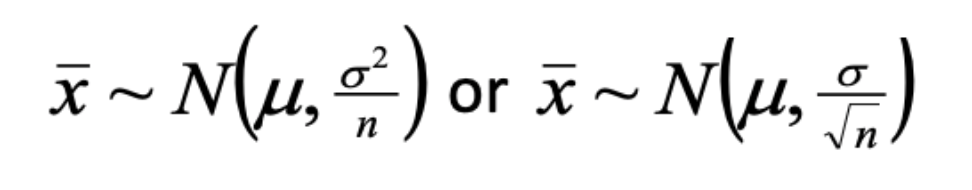

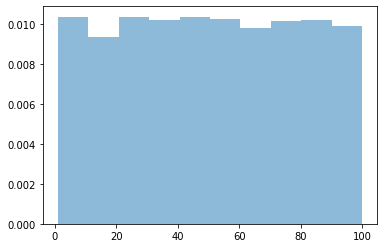

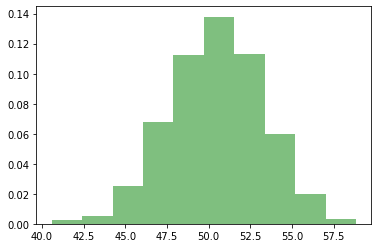

In [3]:
a = 1 # the extreme small random sample in n times
b = 100 # the extreme large random sample in n times
n = 10000 # the number of the samples
DataPop=list(np.random.uniform(a,b,n)) # generate the uniform distribution
# print(len(DataPop))
plt.hist(DataPop, density = True, histtype = 'stepfilled', alpha=0.5) # plot a histogram in order to verify these samples are following uniform distribution 
plt.show() # show the histogram

SamplesMeans = []
for i in range(0,1000):
    DataExtracted = random.sample(DataPop,k = 100) # extract 100 samples from the population without reproducing the values and without changing the input sequence.
    DataExtractedMean = np.mean(DataExtracted) # calculate the sample means
    SamplesMeans.append(DataExtractedMean) # append in a new array

plt.figure()
plt.hist(SamplesMeans, density = True, histtype='stepfilled', alpha=0.5, color = "green")
plt.show()

3- Use the integration methodology using Monte Carlo in Page 104 to calculate the following two integrals. In addition, use Visual representation method in Page 112 to draw the Plot of numerical integration results.

a) 𝐼=∫!2𝑥/(2−𝑥)𝑑𝑥 "\
b) 𝐼=∫#𝑥#𝑑𝑥 $

Integral Calculator: https://www.integral-calculator.com/

Numerical integration = 397.92880000000054


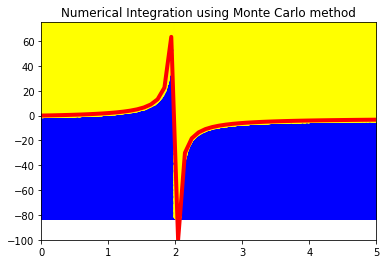

In [4]:
random.seed(2)
f = lambda x:(2*x)/(2-x) # because float cannot devide by zero we need to set the condition in order to smoothly run the code based on the equation
a = 0.0
b = 5.0
NumSteps = 100
XIntegral=[]  
YIntegral=[]
XRectangle=[]  
YRectangle=[]

ymin = f(a)
ymax = ymin
# extract min and max in the distribution

for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps # calculate the rectangle area
    if ((2-x) != 0):
      y = f(x)
    if y < ymin: 
      ymin = y
    if y > ymax: 
      ymax = y


# applying in Monte Carlo method
A = (b - a) * (ymax - ymin)
N = 1000000 # set the numbers of random pairs we want to generate
M = 0 # the number of points that fall under the curve that represents f(x)
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
            M += 1 
            XIntegral.append(x)
            YIntegral.append(y)  
    else:
            XRectangle.append(x) 
            YRectangle.append(y)              
NumericalIntegral = M / N * A
print("Numerical integration = " + str(NumericalIntegral))

XLin = np.linspace(a,b)
YLin=[]
for x in XLin:
    YLin.append(f(x))

plt.axis([0, b, -100, 75])  # extending y scale                                   
plt.plot(XLin,YLin, color="red" , linewidth="4") 
plt.scatter(XIntegral, YIntegral, color="blue", marker =".") 
plt.scatter(XRectangle, YRectangle, color="yellow", marker =".")
plt.title("Numerical Integration using Monte Carlo method")
plt.show()


Numerical integration = 17.969238679220876


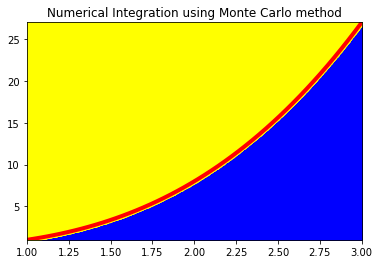

In [5]:
random.seed(1)
f = lambda x: pow(x, 3) # using syntax without define a new function 
a = 1.0
b = 3.0
NumSteps = 1000000
XIntegral=[]  
YIntegral=[]
XRectangle=[]  
YRectangle=[]

ymin = f(a)
ymax = ymin
# extract min and max without repeated min/max
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps # calculate the rectangle area
    if ((2-x) != 0):
      y = f(x)
    if y < ymin: 
      ymin = y
    if y > ymax: 
      ymax = y

# applying in Monte Carlo method
A = (b - a) * (ymax - ymin)
N = 1000000 # set the numbers of random pairs we want to generate
M = 0 # the number of points that fall under the curve that represents f(x)
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
            M += 1 
            XIntegral.append(x)
            YIntegral.append(y)  
    else:
            XRectangle.append(x) 
            YRectangle.append(y)              
NumericalIntegral = M / N * A
print ("Numerical integration = " + str(NumericalIntegral))

XLin=np.linspace(a,b)
YLin=[]
for x in XLin:
    YLin.append(f(x))

plt.axis([1, b, 1, f(b)]) # start with 1                                            
plt.plot(XLin,YLin, color="red" , linewidth="4") 
plt.scatter(XIntegral, YIntegral, color="blue", marker   =".") 
plt.scatter(XRectangle, YRectangle, color="yellow", marker   =".")
plt.title("Numerical Integration using Monte Carlo method")
plt.show()


# Chapter 5
4- Using P=0.45, P=0.5, and P=0.55 and redo the simple random walk in Page 130-132 for each value of P. Draw the trend plot of the random walk and provide explanations about each trend and the impact of P in the trend.

We can conclude that if the probability of add 1 is less than 50%, the values of random walk will decrease as step move increases.

In [6]:
# Simulating a one-dimensional random walk
from random import seed
from random import random
from matplotlib import pyplot

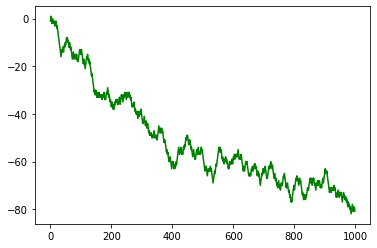

In [7]:
# p = 0.45, q = 0.55
"""
+1 with probability p > 0
-1 with probability q
p + q = 1
Equation: Xn = Xn-1 + Zn; n = 1, 2, 3........, n
Xn-1 is the observation in the previous time phase
Zn is the random fluctuation in that step
"""
seed(1) # set.seed
RWPath = list() # contain the values representative of the random walk
RWPath.append(-1 if random() < 0.55 else 1) # the first value

# start with the second value
for i in range(1, 1000): 
  ZNValue = -1 if random() < 0.55 else 1
  XNValue = RWPath[i-1] + ZNValue # the previous values add the current one
  RWPath.append(XNValue) # save in the new array

pyplot.plot(RWPath, color = "green")
pyplot.show()

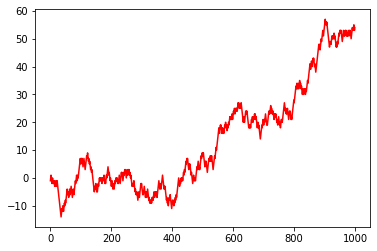

In [8]:
# p = 0.5, q = 0.5
"""
+1 with probability p > 0
-1 with probability q
p + q = 1
Equation: Xn = Xn-1 + Zn; n = 1, 2, 3........, n
Xn-1 is the observation in the previous time phase
Zn is the random fluctuation in that step
"""
seed(1) # set.seed
RWPath = list() # contain the values representative of the random walk
RWPath.append(-1 if random() < 0.5 else 1) # the first value

# start with the second value
for i in range(1, 1000): 
  ZNValue = -1 if random() < 0.5 else 1
  XNValue = RWPath[i-1] + ZNValue # the previous values add the current one
  RWPath.append(XNValue) # save in the new array

pyplot.plot(RWPath, color = "red")
pyplot.show()

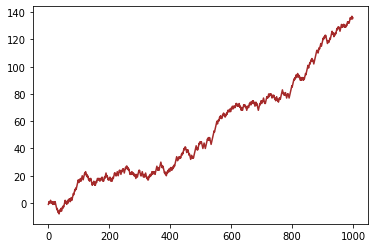

In [9]:
# p = 0.55, q = 0.45
"""
+1 with probability p > 0
-1 with probability q
p + q = 1
Equation: Xn = Xn-1 + Zn; n = 1, 2, 3........, n
Xn-1 is the observation in the previous time phase
Zn is the random fluctuation in that step
"""
seed(1) # set.seed
RWPath = list() # contain the values representative of the random walk
RWPath.append(-1 if random() < 0.45 else 1) # the first value

# start with the second value
for i in range(1, 1000): 
  ZNValue = -1 if random() < 0.45 else 1
  XNValue = RWPath[i-1] + ZNValue # the previous values add the current one
  RWPath.append(XNValue) # save in the new array

pyplot.plot(RWPath, color = "brown")
pyplot.show()

5- Simulating weather forecast according to the following probability values.\
P(Sunny| Sunny)=0.75, P(Sunny| Rainy) = 0.25 \
P(Rainy| Sunny)=0.3 P(Rainy| Rainy) = 0.7

a) Plot the weather forecast for the next 365 days.\
b) Draw the histogram of the weather forecast.\
c) Draw a histogram for the weather forecast for different days of the week. You can draw one histogram for the number of sunny days during different days of the week and another histogram for the number of rainy days during days of the week. You can also combine and use two bars (one for rainy and one for sunny days) during a week. Is there any difference among different days?

Weather initial condition = Sunny


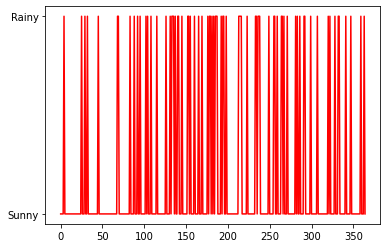

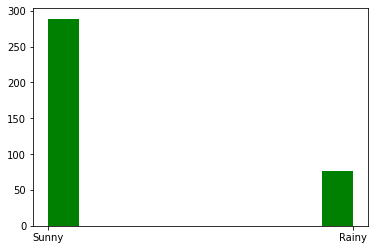

In [10]:
# Simulating a weather forcast
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
StatesData = ["Sunny","Rainy"] # possible wether conditions

TransitionStates = [["SuSu","SuRa"],["RaRa","RaSu"]] # transitions matrix: "SuSu" means the first day is sunny and the second day is sunny day too
TransitionMatrix = [[0.75, 0.25], [0.3, 0.7]] # The transition matrix returns the conditional probabilities P (A | B)
# P (A | B) = probability of event A given B has occoured

WeatherForecasting = [] # create a list to store each result
NumDays = 365 # 365 days
TodayPrediction = StatesData[0] # default is a sunny day

print("Weather initial condition =", TodayPrediction)


for i in range(NumDays): # predict " next 365 days", the textbook only have predict 364 days
    
    if TodayPrediction == "Sunny":        
        TransCondition = np.random.choice(TransitionStates[0], replace=True, p = TransitionMatrix[0]) # random.choice = "SuSu" or "SuRa"
        # p = The probabilities associated with each entry in ["SuSu","SuRa"]. If not given the sample assumes a uniform distribution over all entries in TransitionMatrix[0].
        if TransCondition == "SuSu":
            pass
        else:
            TodayPrediction = "Rainy"   
    elif TodayPrediction == "Rainy":
        TransCondition = np.random.choice(TransitionStates[1], replace=True, p = TransitionMatrix[1])
        if TransCondition == "RaRa":
            pass
        else:
            TodayPrediction = "Sunny"
     
    WeatherForecasting.append(TodayPrediction) # save the final result 
    # print(TodayPrediction)

# predict the weather forecast for the next 365 days in plot
plt.plot(WeatherForecasting, color = "red")
plt.show()

# Draw the histogram of the weather forecast
plt.figure()
plt.hist(WeatherForecasting, color = "green")
plt.show()
# print(len(WeatherForecasting))
# Draw a histogram for the weather forecast for different days of the week


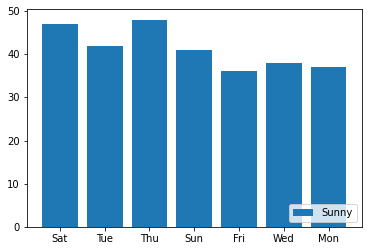

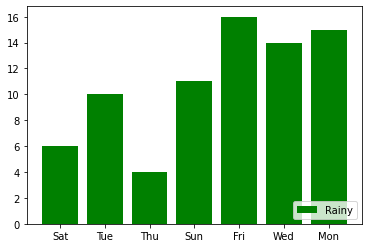

In [11]:
# Draw a histogram for the weather forecast for different days of the week

AYear = WeatherForecasting # predict 365 days
# print(len(AYear))

# let we start with Monday and end with Sunday, and set a year is equal to 365 days
Mon=[0,0]
Tue=[0,0]
Wed=[0,0]
Thu=[0,0]
Fri=[0,0]
Sat=[0,0]
Sun=[0,0]

for idx,i in enumerate(AYear):
  if idx%7==0:
    if i=="Sunny":
      Mon[0]+=1
    if i=="Rainy":
      Mon[1]+=1
  if idx%7==1:
    if i=="Sunny":
      Tue[0]+=1
    if i=="Rainy":
      Tue[1]+=1
  if idx%7==2:
    if i=="Sunny":
      Wed[0]+=1
    if i=="Rainy":
      Wed[1]+=1
  if idx%7==3:
    if i=="Sunny":
      Thu[0]+=1
    if i=="Rainy":
      Thu[1]+=1
  if idx%7==4:
    if i=="Sunny":
      Fri[0]+=1
    if i=="Rainy":
      Fri[1]+=1
  if idx%7==5:
    if i=="Sunny":
      Sat[0]+=1
    if i=="Rainy":
      Sat[1]+=1
  if idx%7==6:
    if i=="Sunny":
      Sun[0]+=1
    if i=="Rainy":
      Sun[1]+=1

bars = {'Mon','Tue','Wed','Thu','Fri','Sat','Sun'}
Week = [Mon, Tue, Wed, Thu, Fri, Sat, Sun]
WeekSunny = [Mon[0], Tue[0], Wed[0], Thu[0], Fri[0], Sat[0], Sun[0]]
WeekRainy = [Mon[1], Tue[1], Wed[1], Thu[1], Fri[1], Sat[1], Sun[1]]

# Sunny
y=np.arange(7)
plt.figure()
plt.bar(y, WeekSunny, tick_label = ["Mon, Tue, Wed, Thu, Fri, Sat, Sun"])
plt.xticks(y, bars)
plt.legend(["Sunny", "Rainy"], loc ="lower right")
plt.show()

# Rainy
y=np.arange(7)
plt.figure()
plt.bar(y,WeekRainy, color = "green")
plt.xticks(y, bars)
plt.legend(["Rainy"], loc ="lower right")
plt.show()
# print(len(AYear))

Is there any difference among different days?

- Obviously, the sunny days are more than rain days, especially on Wednesday and Friday.

Given that Monday is sunny find the following probability values:

d) Tuesday is rainy


In [12]:
WeatherForecasting = WeatherForecasting[:364] # In order to divide to 7 with no remainder, we need to remove the last index. That is, 364 % 7 == 0
weekly = np.array_split(WeatherForecasting, 52) # split to 52 weeks from a year"
# print(type(weekly[0]))

cnt = 0
for i in range(len(weekly)):
  if weekly[i][0]== "Sunny" and weekly[i][1] == "Rainy":
      cnt += 1

pd = (cnt/52)
print("The probability is {}".format(pd))
# print(len(WeatherForecasting))

The probability is 0.15384615384615385


e) Tuesday and Wednesday are both Sunny

In [13]:
cnt = 0

for i in range(len(weekly)):
  if weekly[i][0] == "Sunny" and weekly[i][1] == "Sunny" and weekly[i][2] == "Sunny":
    cnt += 1

pe = (cnt/52)
print("The probability is {}".format(pe))

The probability is 0.6730769230769231


# Chapter 6
(Jackknife resampling) Do the resampling of 250 and 500 randomly generated values and calculate the coefficient of variation. Report the correlation of variation in different stages of the resampling. Use two different number of samples (N) in the starting distribution (according to the number of values). Explain what Pseudo value is in the resampling method described in the Jackknife resampling method. Draw the distribution of pseudo values.

The funaction of Pseudo value in Jackknife resampling method is to treat the pseudovalues as independent random variables with mean $\theta$. Then, according to Jackknife resamping method's result, we can obtain confidence intervals and perform statistical test, such as p-value for the hypothesis testing, variance and reduce bias of a large population.

References: 
1. https://www.datasciencecentral.com/profiles/blogsresampling-methods-comparison
2. https://www.stat.berkeley.edu/~hhuang/STAT152/Jackknife-Bootstrap.pdf

The coefficient of variation is 0.5800698843053581


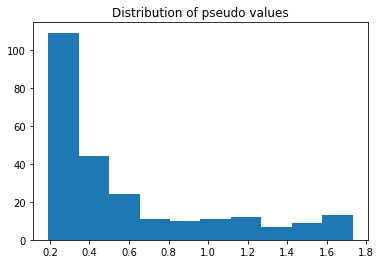

0.5794526900278857
0.19928890251642734
0.0007971556100657093


In [14]:
# resampling 250 
import random
import statistics 
import matplotlib.pyplot as plt

PopData = []
random.seed(5)

for i in range(250): # 250 randomly generated values
    DataElem = 10 * random.random() # 10*0 to 1 so the distribution would be 0 - 10
    PopData.append(DataElem) 
    

def CVCalc(Dat): # calculate the coefficient of variation
    CVCalc = statistics.stdev(Dat)/statistics.mean(Dat) # cv = sd/mean, cv is the ratio of the standard deviation to the mean. 
    return CVCalc

CVPopData = CVCalc(PopData)
print("The coefficient of variation is {}".format(CVPopData))

N = len(PopData)
JackVal = [] # Jackknife values
PseudoVal = [] # Jackknife pseudo values

for i in range(N-1): # Jackknife method should be leaving out one sample observation at a time so the legth of JackVal[] should be n-1
    JackVal.append(0)
for i in range(N):
    PseudoVal.append(0)
# print(len(JackVal), len(PseudoVal))

for i in range(N): # calculate the Jack values (leaving a xi observation out of the original sample)
    for j in range(N): 
        if j < i: 
            JackVal[j] = PopData[j]
        else:
            if j > i:
                JackVal[j-1]= PopData[j]
    PseudoVal[i] = N*CVCalc(PopData)-(N-1)*CVCalc(JackVal) # equation of the PswudoVal

# visualize the distribution of pseudo values
plt.hist(PseudoVal)
plt.title("Distribution of pseudo values")
plt.show()

# mean of the pseudo values
MeanPseudoVal=statistics.mean(PseudoVal)
print(MeanPseudoVal)

# variance of the pseudo values
VariancePseudoVal=statistics.variance(PseudoVal)
print(VariancePseudoVal)

# variance of the Jackknife estimator
VarJack = statistics.variance(PseudoVal)/N
print(VarJack)

The coefficient of variation is 0.5878616298272088


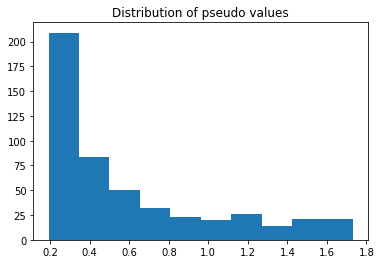

0.5875753873866358
0.18866804652472072
0.00037733609304944145


In [15]:
# resampling 500 
import random
import statistics 
import matplotlib.pyplot as plt

PopData = []
random.seed(5) # same as the textbook

for i in range(500): # 500 randomly generated values
    DataElem = 10 * random.random() # 10*0 to 1 so the distribution would be 0 - 10
    PopData.append(DataElem) 

def CVCalc(Dat): # calculate the coefficient of variation
    CVCalc = statistics.stdev(Dat)/statistics.mean(Dat) # cv = sd/mean, cv is the ratio of the standard deviation to the mean. 
    return CVCalc

CVPopData = CVCalc(PopData)
print("The coefficient of variation is {}".format(CVPopData))

N = len(PopData)
JackVal = [] # Jackknife values
PseudoVal = [] # Jackknife pseudo values

for i in range(N-1): # Jackknife method should be leaving out one sample observation at a time so the legth of JackVal[] should be n-1
    JackVal.append(0)
for i in range(N):
    PseudoVal.append(0)
# print(len(JackVal), len(PseudoVal))

for i in range(N): # calculate the Jack values (leaving a xi observation out of the original sample)
    for j in range(N): 
        if j < i: 
            JackVal[j] = PopData[j]
        else:
            if j > i:
                JackVal[j-1]= PopData[j]
    PseudoVal[i] = N*CVCalc(PopData)-(N-1)*CVCalc(JackVal) # equation of the PswudoVal

# visualize the distribution of pseudo values
plt.hist(PseudoVal)
plt.title("Distribution of pseudo values")
plt.show()

# mean of the pseudo values
MeanPseudoVal=statistics.mean(PseudoVal)
print(MeanPseudoVal)

# variance of the pseudo values
VariancePseudoVal=statistics.variance(PseudoVal)
print(VariancePseudoVal)

# variance of the Jackknife estimator
VarJack = statistics.variance(PseudoVal)/N
print(VarJack)

# Chapter 7
7- Using the Gradient Descent algorithm in Python calculate the maximum/minimum value of

$$𝑦 = −3𝑥^2 − 5𝑥 + 2$$

a) Explain about the learning rate variable. Try 0.1, 0.5, and 0.01 and compare the results.\
b) List the last 10 values of y in the iterations.\
c) Now imposing a restriction on x, and having a new feasible set, calculate the following optimization problem.


$$𝑦 = −3𝑥^2 − 5𝑥 + 2$$
$$𝑠.𝑡.𝑥 ≥0$$

The gradient descent algorithm is searching for the minimum objective function through an iterative process.

- The value of the learning rate determines how quickly or slowly we move towards the optimal values of the objective function, if the learing rate small, we will have many steps (iterations) to find the best solution. Conversely, if the learning rate huge, we will leap the optimal solution
- Derivative Calculator: https://www.derivative-calculator.net/

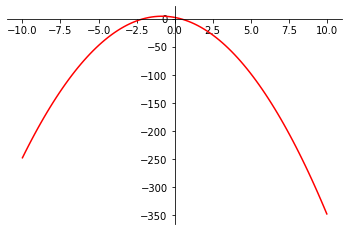

The last 10 X values of f(x) maximum =  [-0.8308211200000001, -0.832328448, -0.8329313792, -0.83317255168, -0.833269020672, -0.8333076082688, -0.83332304330752, -0.833329217323008, -0.8333316869292032, -0.8333326747716813]
The last 10 values of y in the iterations is [4.0833144  4.0833303  4.08333285 4.08333326 4.08333332 4.08333333
 4.08333333 4.08333333 4.08333333 4.08333333]


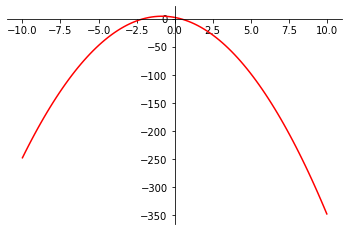

The last 10 X values of f(x) maximum =  [-3.3648227621934625e+305, 6.729645524386924e+305, -1.345929104877385e+306, 2.6918582097547697e+306, -5.38371641950954e+306, 1.0767432839019079e+307, -2.153486567803816e+307, 4.3069731356076315e+307, -inf, nan]
The last 10 values of y in the iterations is [-inf -inf -inf -inf -inf -inf -inf -inf  nan  nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in subtract


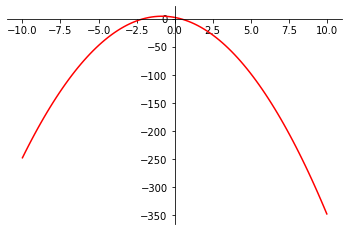

The last 10 X values of f(x) maximum =  [-0.8333067796680359, -0.8333083728879538, -0.8333098705146765, -0.8333112782837959, -0.8333126015867681, -0.8333138454915621, -0.8333150147620684, -0.8333161138763443, -0.8333171470437637, -0.8333181182211379]
The last 10 values of y in the iterations is [4.08333333 4.08333333 4.08333333 4.08333333 4.08333333 4.08333333
 4.08333333 4.08333333 4.08333333 4.08333333]


In [16]:
def gradientDescent(learningRate):
  x = np.linspace(-10, 10, 100) 
  y= (-3*x**2)-5*x+2

  # visualize the maximum point of the function
  fig = plt.figure()
  axdef = fig.add_subplot(1, 1, 1)
  axdef.spines['left'].set_position('center')
  axdef.spines['bottom'].set_position('zero')
  axdef.spines['right'].set_color('none')
  axdef.spines['top'].set_color('none')
  axdef.xaxis.set_ticks_position('bottom')
  axdef.yaxis.set_ticks_position('left')

  plt.plot(x,y, 'r')
  plt.show()

  Gradf = lambda x: -6*x-5  # define the gradient function (The derivative of y equation)

  ActualX = 3 
  LearningRate =  learningRate # learn rate variable
  PrecisionValue = 0.000001 # defines the degree of precision 
  PreviousStepSize = 1 
  MaxIteration = 10000 # will be used to stop the procedure if it does not converge
  IterationCounter = 0 # counter

  lastTen = [] 
  while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration: # Define the gradient descent
      PreviousX = ActualX
      ActualX = ActualX + LearningRate * Gradf(PreviousX) # find the max 
      lastTen.append(ActualX)
      PreviousStepSize = abs(ActualX - PreviousX) 
      IterationCounter = IterationCounter+1 
      # print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ", ActualX) 

  print('The last 10 X values of f(x) maximum = ', lastTen[-10:])
  lastTen = np.array(lastTen[-10:])
  z = (-3*lastTen**2)-5*lastTen+2
  print("The last 10 values of y in the iterations is", z)

gradientDescent(0.1)
gradientDescent(0.5)
gradientDescent(0.01)

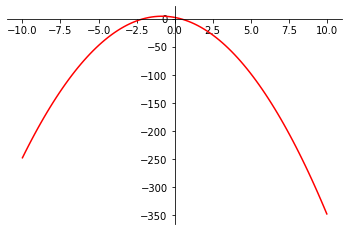

The last 10 X values of f(x) maximum =  [0.6999999999999997]
The last 10 values of y in the iterations is [-2.97]


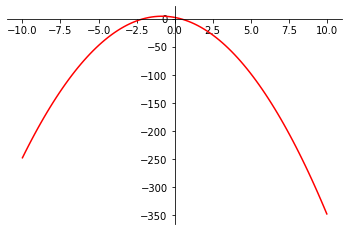

The last 10 X values of f(x) maximum =  []
The last 10 values of y in the iterations is []


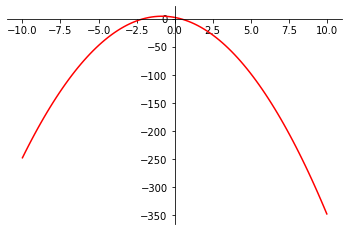

The last 10 X values of f(x) maximum =  [0.6819518952454467, 0.59103478153072, 0.5055726946388768, 0.42523833296054414, 0.3497240329829115, 0.2787405910039368, 0.21201615554370057, 0.14929518621107854, 0.09033747503841383, 0.034917226536109]
The last 10 values of y in the iterations is [-2.80493464 -2.00314025 -1.29467472 -0.66867458 -0.11554086  0.37320809
  0.80506667  1.18665691  1.52383005  1.82175623]


In [18]:
def gradientDescentRestrictionX(learningRate):
    x = np.linspace(-10, 10, 100) 
    y= (-3*x**2)-5*x+2

    # visualize the maximum point of the function
    fig = plt.figure()
    axdef = fig.add_subplot(1, 1, 1)
    axdef.spines['left'].set_position('center')
    axdef.spines['bottom'].set_position('zero')
    axdef.spines['right'].set_color('none')
    axdef.spines['top'].set_color('none')
    axdef.xaxis.set_ticks_position('bottom')
    axdef.yaxis.set_ticks_position('left')

    plt.plot(x,y, 'r')
    plt.show()

    Gradf = lambda x: -6*x-5  # define the gradient function (The derivative of y equation)

    ActualX = 3 
    LearningRate =  learningRate # learn rate variable
    PrecisionValue = 0.000001 # defines the degree of precision 
    PreviousStepSize = 1 
    MaxIteration = 10000 # will be used to stop the procedure if it does not converge
    IterationCounter = 0 # counter

    lastTen = [] 
    while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration: # Define the gradient descent
        PreviousX = ActualX
        ActualX = ActualX + LearningRate * Gradf(PreviousX)
        if ActualX < 0:
          break
        lastTen.append(ActualX)
        PreviousStepSize = abs(ActualX - PreviousX) 
        IterationCounter = IterationCounter+1 
        # print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ", ActualX) 

    print('The last 10 X values of f(x) maximum = ', lastTen[-10:])
    lastTen = np.array(lastTen[-10:])
    z = (-3*lastTen**2)-5*lastTen+2
    print("The last 10 values of y in the iterations is", z)

gradientDescentRestrictionX(0.1)
gradientDescentRestrictionX(0.5)
gradientDescentRestrictionX(0.01)

8- In one paragraph explain how does the Newton-Raphson method work

a) Using this method find the optimal value of the same function as the above
example. Explain the details.

$$𝑦 = −3𝑥^2 − 5𝑥 + 2$$

b) Draw the maximum/minimum point of the function.\
c) In how many iterations did you find the results. Compare the performance with the
Gradient descent algorithm in Problem 7.

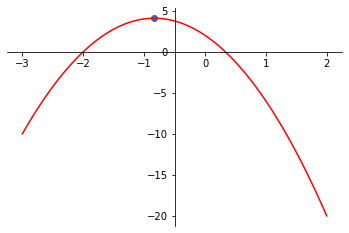

X value of f(x) maximum =  -0.8333333333333334


In [ ]:
x = np.linspace(-3, 2, num = 100) # creates numerical sequences(start, stop, num: Number of samples to generate. Default is 50. Must be non-negative.)
y = -3*x**2-5*x+2

fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')

# print('Value of x at the minimum of the function', x[np.argmin(y)]) # np.argmin(): returns the indices of the minimum values along an axis

plt.plot(x,y, 'r')



FirstDerivative = lambda x: -6*x-5 
SecondDerivative = lambda x: -6  

ActualX = 3 
PrecisionValue = 0.000001 
PreviousStepSize = 1 
MaxIteration = 10000 
IterationCounter = 0 
points = []
while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
    # xn+1 = xn - df(xn)/ df(xn)^2
    PreviousX = ActualX
    ActualX = ActualX - FirstDerivative(PreviousX)/ SecondDerivative(PreviousX)
    points.append(ActualX)
    PreviousStepSize = abs(ActualX - PreviousX) 
    IterationCounter = IterationCounter+1 
    #print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX) 

# draw the maximum point of the function    
plt.scatter(ActualX, -3*ActualX**2-5*ActualX+2)
plt.show()   
print("X value of f(x) maximum = ", ActualX)

In [ ]:
# how many iterations did you find the results in Newton-Raphson method?
print(IterationCounter) # 2 iterations\

2


Compare the performance with the Gradient descent algorithm in Problem 7.

- Gradient descent is used to find local maxima or minima. That is, x to make min f(x) or max f(x). On the other hands, Newton's method is to find the root of a function. That is, x to make f(x) = 0. 
- In this case, we can see that using the Newton Raphson method is faster. It only run 2 iterations then we got the solution. Compared to the Gradient descent method, it would take more iterations to calculate the result.


References
- https://stackoverflow.com/questions/12066761/what-is-the-difference-between-gradient-descent-and-newtons-gradient-descent
- https://brilliant.org/wiki/newton-raphson-method/
